這次的實驗我們使用非常有名的鳶尾花資料集
作為我們練習的內容


In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [156]:
iris = datasets.load_iris()

In [157]:
iris_data = iris.data

有說明 iris 的細節 https://zh.wikipedia.org/wiki/%E5%AE%89%E5%BE%B7%E6%A3%AE%E9%B8%A2%E5%B0%BE%E8%8A%B1%E5%8D%89%E6%95%B0%E6%8D%AE%E9%9B%86

In [158]:
iris_data_name = pd.DataFrame(iris_data)

In [159]:
iris_data_name = iris_data_name.rename(index=str, columns={0:"花萼長度", 1:"花萼寬度", 2:"花辦長度", 3:"花辦寬度",})
iris_data_name

,花萼長度,花萼寬度,花辦長度,花辦寬度
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [160]:
iris_data_name.describe()

,花萼長度,花萼寬度,花辦長度,花辦寬度
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 在這次的實驗中，我們拿花萼長度與寬度做training

In [161]:
x = iris.data[:,:2]
y = iris.target
x

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# 看一下KNN的分數

In [183]:
n_neighbors = 13

knn_alg = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knn_alg.fit(X_train, Y_train)
knn_alg_pred = knn_alg.predict(X_test)

train_score = knn_alg.score(X_train, Y_train)
pred_scoure = knn_alg.score(X_test, Y_test)
print(train_score, " , ", pred_scoure)
#0.68是最好的成績

0.9375  ,  0.6842105263157895


# 我們將花萼長度與寬度 放在二維的圖上

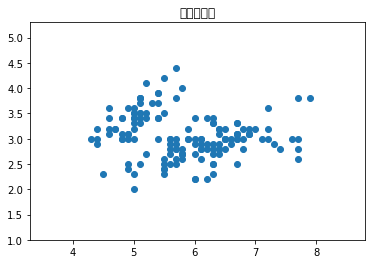

In [40]:
import matplotlib
 
import numpy as np
import matplotlib.pyplot as plt

#畫網格
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = 0.1
X1, Y1 = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 用scatter畫散點圖
plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(X1.min(), X1.max())
plt.ylim(Y1.min(), Y1.max())
plt.title("資料散佈圖")
plt.show()

(2464,)


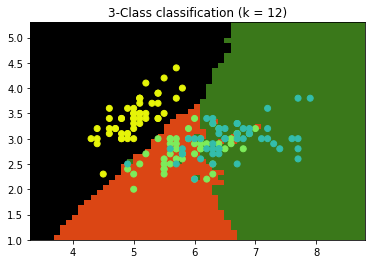

In [188]:
#設定背景顏色
cmap_light = ListedColormap(['#000000', '#db4614','#3a781a'])
#setting point color
cmap_bold = ListedColormap(['#e6f408', '#7dec5b','#33bdab'])

# 選擇要計算幾個鄰近的neighbors
n_neighbors = 12

knn_alg = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knn_alg.fit(X_train, Y_train)
 
# 計算裡面有的最大值最小值
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

# 在平面上畫畫格
h = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
 
# 預測
knn_pred = knn_alg.predict(np.c_[xx.ravel(), yy.ravel()])
print(knn_pred.shape)

#將output做shape，印出預測值的範圍
knn_pred = knn_pred.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, knn_pred, cmap = cmap_light)
 
# 將資料集中的數據畫成點，印出來與預測的圖做比較
plt.scatter(x[:, 0], x[:, 1], c = y, cmap = cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.show()